### Mutual information betwen FC and stimulus

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

#### Load data

In [6]:
# Root path
root = os.path.expanduser("~/funcog/gda/Results/lucy/mutual_information/")
# Load data for coherence
tval = xr.load_dataarray(os.path.join(root, "t_coh_avg_1_thr_1.nc"))
pval = xr.load_dataarray(os.path.join(root, "pval_coh_avg_1_thr_1.nc"))
t_coh = tval * (pval <= 0.05)

# Load data for plv
tval = xr.load_dataarray(os.path.join(root, "t_plv_avg_1_thr_1.nc"))
pval = xr.load_dataarray(os.path.join(root, "pval_plv_avg_1_thr_1.nc"))
t_plv = tval * (pval <= 0.05)

#### Number of significant effects per task stage

In [37]:
n_freqs = t_coh.sizes["freqs"]
n_times = t_coh.sizes["times"]


n_effects_coh = np.zeros((n_freqs, n_times))
n_effects_plv = np.zeros((n_freqs, n_times))

for f in range(n_freqs):
    for t in range(n_times):
        n_effects_coh[f, t] = (t_coh.isel(freqs=f, times=t) > 0).sum()
        n_effects_plv[f, t] = (t_plv.isel(freqs=f, times=t) > 0).sum()

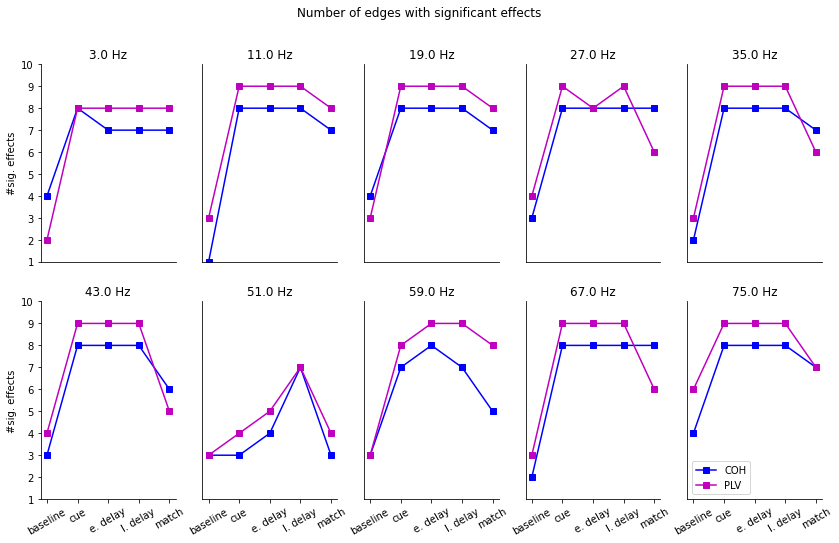

In [51]:
plt.figure(figsize=(14, 8))
for f in range(n_freqs):
    ax = plt.subplot(2, n_freqs // 2, f + 1)
    plt.plot(n_effects_coh[f], "s-", label="COH", color="b")
    plt.plot(n_effects_plv[f], "s-", label="PLV", color="m")
    plt.title(f"{t_coh.freqs.data[f]} Hz")
    plt.ylim(1, 10)
    if f < 5:
        plt.xticks([])
    else:
        plt.xticks(
            range(5), ["baseline", "cue", "e. delay", "l. delay", "match"], rotation=30
        )
    if f == 0 or f == 5:
        plt.ylabel("#sig. effects")
    if f not in [0, 5]:
        plt.yticks([])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
plt.suptitle("Number of edges with significant effects")
plt.legend()

#### Areas showing significant effect

In [ ]:
for f in range(10):
    # Get links with signigicant effects
    idx = t.isel(freqs=f).sum("times") > 0
    print(t.roi.data[idx])

In [87]:
import seaborn as sns

sns.set_theme(style="whitegrid")

In [88]:
df

,freqs,times,roi,t
0,3.0,0,F2-V1,2.717054
1,3.0,0,F1-V1,-0.000000
2,3.0,0,a3-V1,1.902633
3,3.0,0,a2-V1,0.000000
4,3.0,0,a1-V1,-0.000000
...,...,...,...,...
395,75.0,4,a2-V1,3.083918
396,75.0,4,a1-V1,3.930317
397,75.0,4,a7B-V1,2.202368
398,75.0,4,V1-V2,0.000000


<AxesSubplot:xlabel='freqs', ylabel='times'>

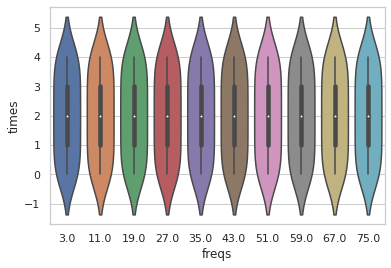

In [91]:
sns.violinplot(x="freqs", y="times", data=df)

/tmp/ipykernel_219549/3055235180.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=30) # set new labels


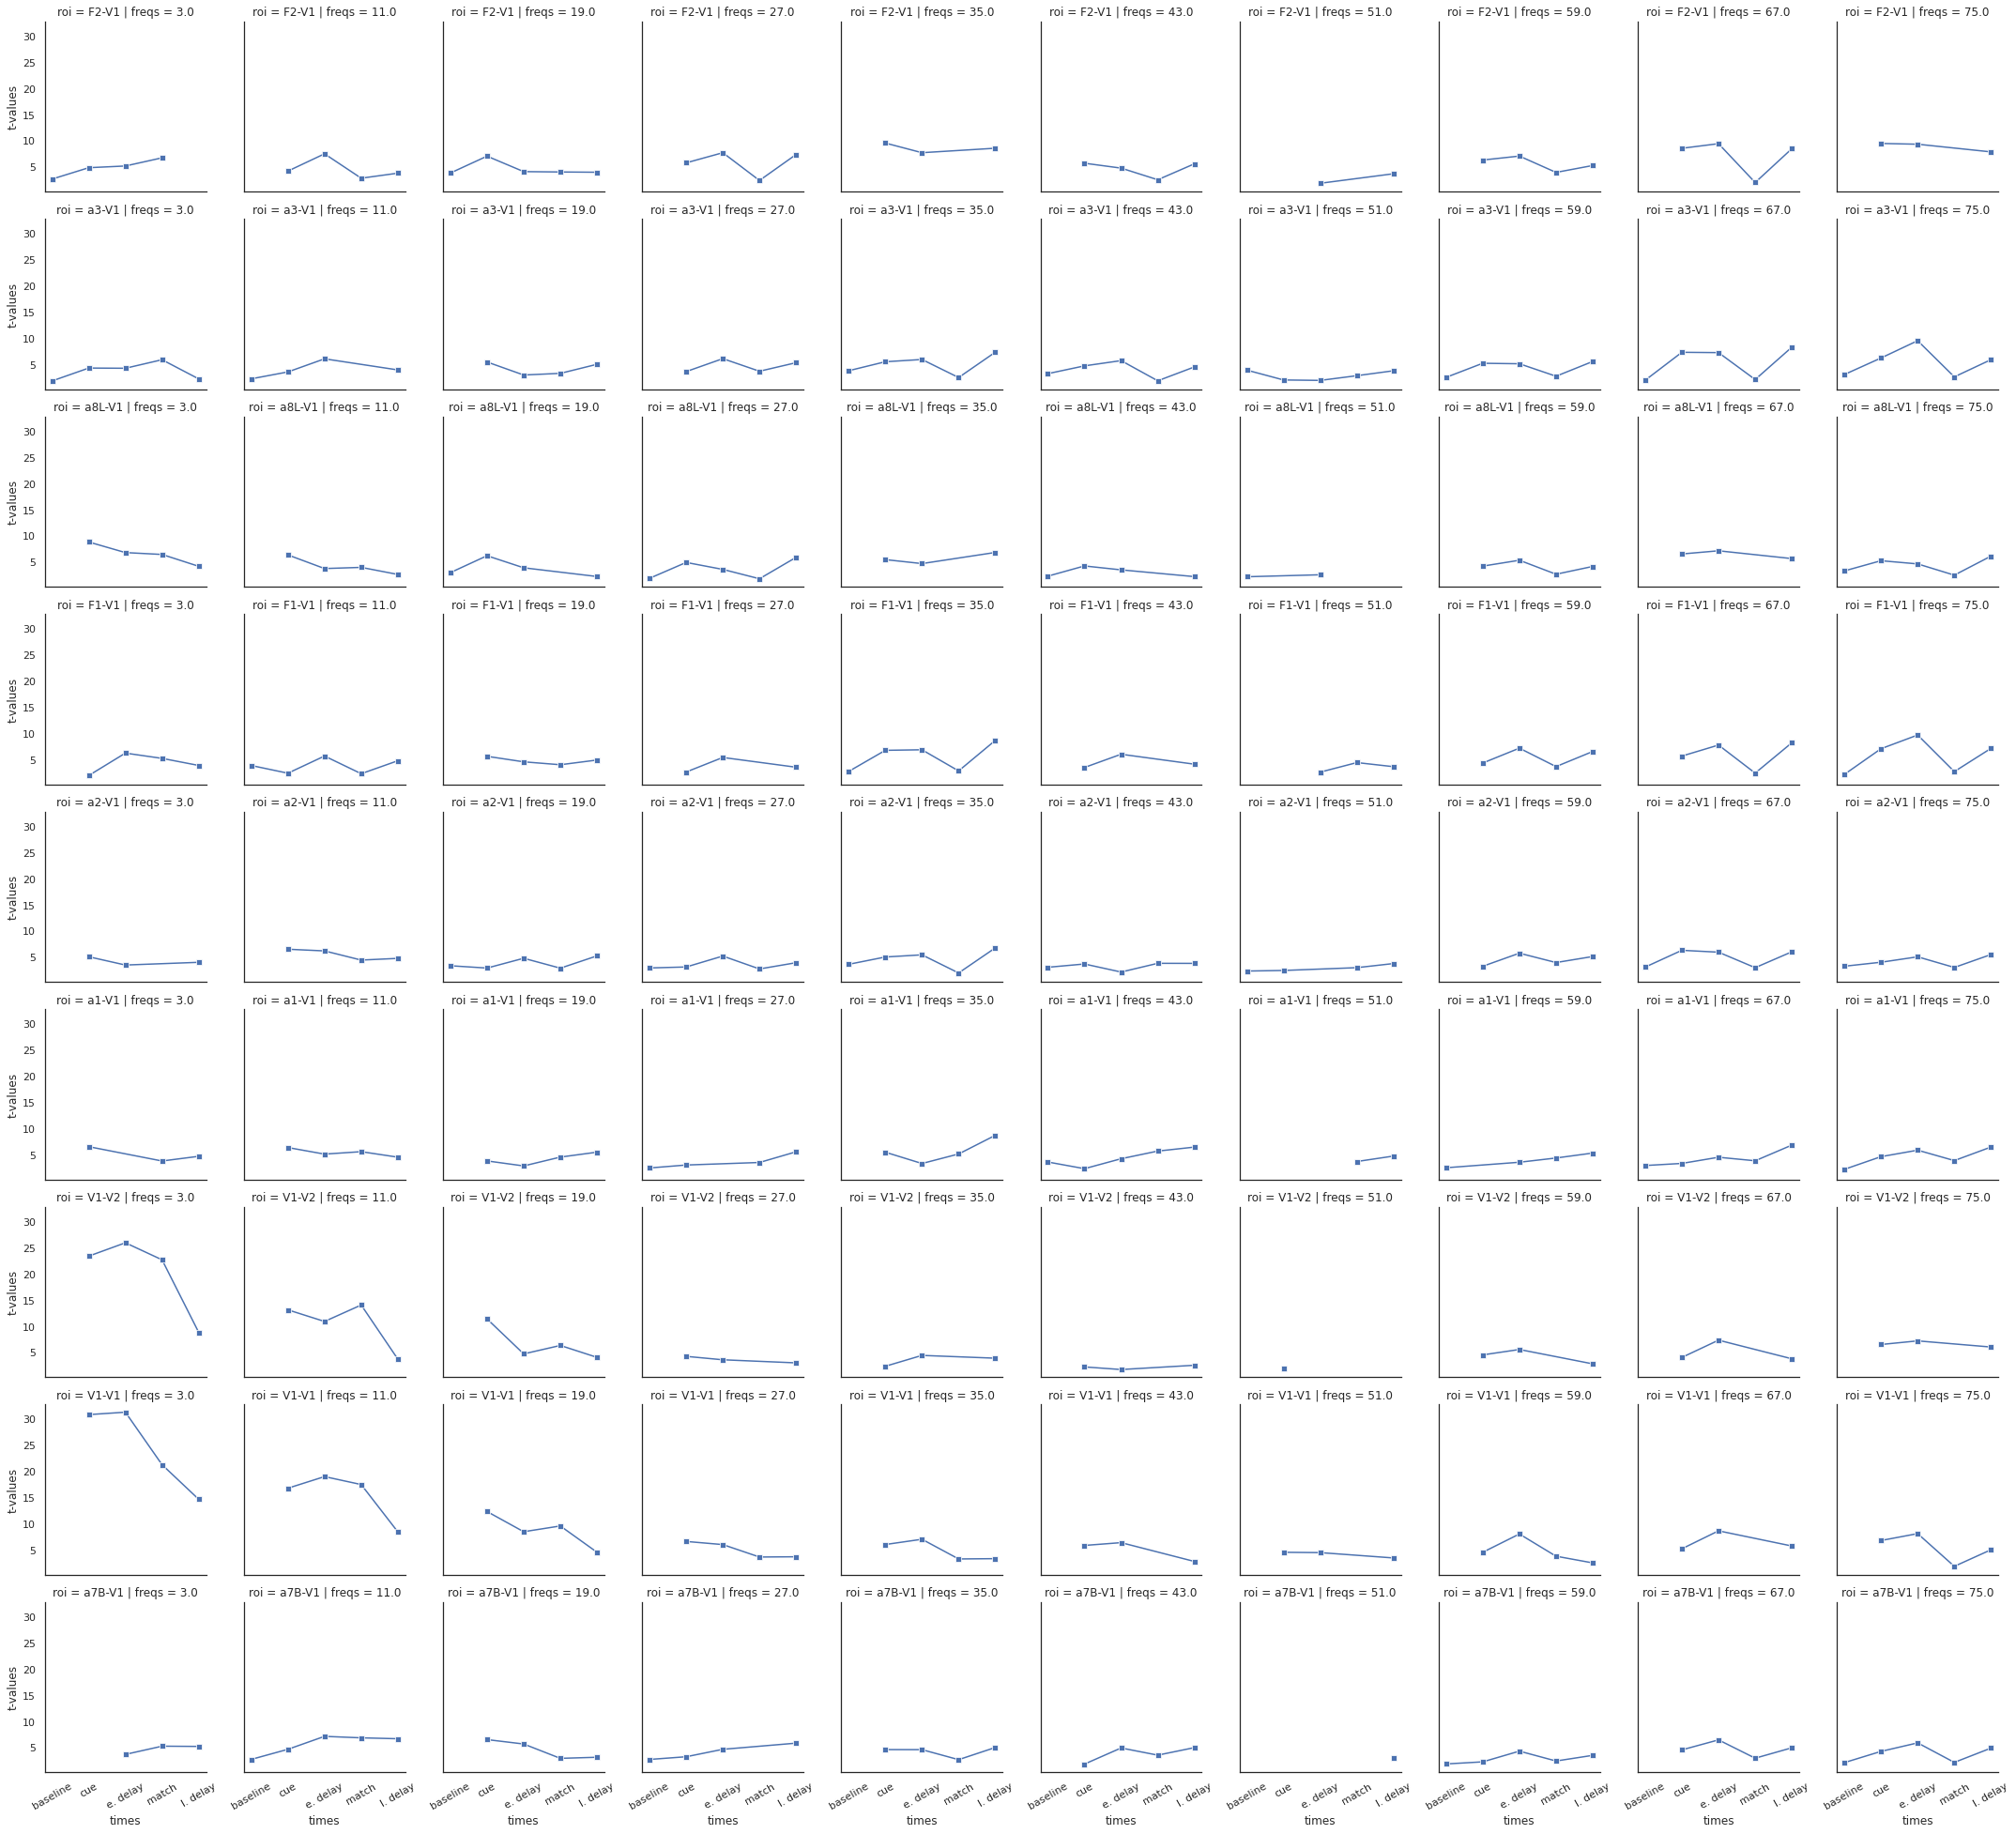

In [75]:
# Create the data

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="freqs", row="roi")
g.map(sns.lineplot, "times", "plv", marker="s", ls="-")
g.set(ylabel="t-values")
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels()  # get x labels
    ax.set_xticklabels(labels, rotation=30)  # set new labels